### Il modello lineare

Importiamo i package necessari:

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

Definiamo un modello di regressione lineare con 10 ingressi e 1 uscita, ci serviamo della funzione di PyTorch <strong>torch.nn.Linear()</strong>:

In [4]:
model = nn.Linear(10,1)

i cui parametri sono i pesi (weight) e il bias, in tutto 11 parametri da ottimizzare:

In [5]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.0545,  0.1071,  0.0842,  0.1253, -0.2586,  0.2178,  0.1154,  0.0982,
           0.0689, -0.1966]], requires_grad=True),
 Parameter containing:
 tensor([-0.2367], requires_grad=True))

Definendo un tensore di ingresso con dimensioni 1x10

In [6]:
x = torch.randn(1,10)

L'uscita del modello è:

In [7]:
y1 = model(x)
y1

tensor([[-0.1014]], grad_fn=<AddmmBackward>)

### Modello lineare, ingresso singolo e training del modello

Facciamo il primo esempio più semplice con un solo ingresso e una sola uscita.

Creiamo un set di dati, costituito da N coppie (x,y), che stanno in una relazione "abbastanza" lineare tra di loro.<br>
Per fare questo definiamo una relazione lineare tra y e x. E aggiungiamo un rumore per rendere la cosa più realistica.

In [8]:
x_samples = torch.linspace(0, 1000, steps=50001).view(-1,1) #l'ingresso deve essere in formato colonna
m = 13.5 #coefficiente angolare
b = 12 #ordinata all'origine
y_samples_lineare = m * x_samples + b  

In [9]:
y_samples_lineare.size()

torch.Size([50001, 1])

In [10]:
y_samples_noise = 200 * torch.randn(x_samples.shape[0], 1) #genera un vettore colonna di dati random, con media 0 e varianza 5 
y_samples_noise.size()

torch.Size([50001, 1])

Abbiamo già visto che i vettori y_samples_lineare e y_samples_noise hanno le stesse dimensioni. Possiamo pertanto sommarli:

In [11]:
y_samples = y_samples_lineare + y_samples_noise

(x_samples, y_samples) è il dataset di punti che devo interpolare (o fittare).

Instanzio il modello lineare con un ingresso e una uscita. Il parametro bias=True indica che devo ottimizare il bias (ordinata all'origine) del modello.

In [12]:
model1 = torch.nn.Linear(1,1, bias=True) 

Il modello ha solo due parametri da ottimizzare, che in accordo alla letteratura classica chiameremo $m$ e $q$:

In [14]:
model1.weight, model1.bias

(Parameter containing:
 tensor([[0.8908]], requires_grad=True),
 Parameter containing:
 tensor([0.8218], requires_grad=True))

Calcolo le uscite del modello lineare appena definito:

In [15]:
y_linmod = model1(x_samples)
y_linmod.size()

torch.Size([50001, 1])

Mettiamo su grafico le due curve (x_samples, y_samples) e (x_samples, y_linmod).<br>
Come si vede il modello lineare non è stato adattato. Pertanto la linea rossa devia nettamente dalla nuvola di punti blu.

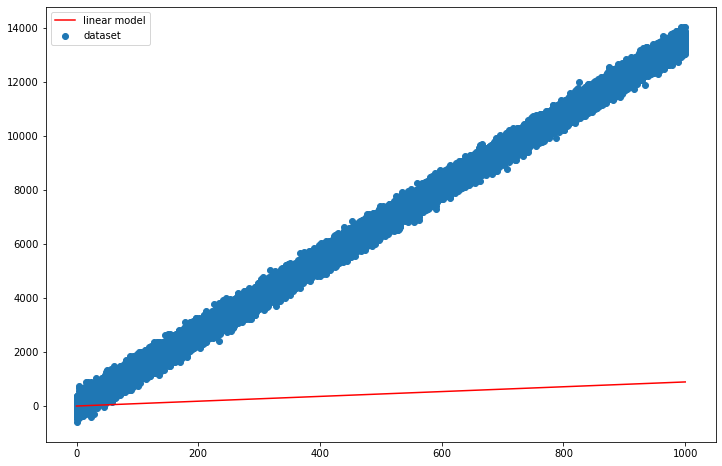

In [16]:
ax = plt.figure(figsize = (12,8))
plt.scatter(x_samples.numpy(),y_samples.numpy(), label="dataset")
plt.plot(x_samples.numpy(),y_linmod.detach().numpy(),'r', label="linear model")
plt.legend()
plt.show()

Calcolo l'errore quadratico medio tra il dataset e il valore corrente dell'uscita. Per qualche motivo la funzione predefinita di PyTorch <strong>nn.MSELoss()</strong> mi da errore, pertanto definisco l'errore quadratico medio esplicitamente.

In [17]:
# errore = nn.MSELoss(y_linmod, y_linmod)
errore = torch.mean(torch.pow(y_samples-y_linmod, 2))
errore

tensor(53166920., grad_fn=<MeanBackward0>)

Calcolo le derivate parziali dell'errore rispetto ai due parametri m e q, usando la funzione backward().

In [18]:
errore.backward()

Come ottimizzatore uso lo SGD (Stochastic Gradient Descent):

In [19]:
optimizer = torch.optim.SGD(model1.parameters(),1e-6)

Itero su un numero basso di iterazioni, poiché la convergenza è veloce.

tensor(53166920., grad_fn=<MeanBackward0>)


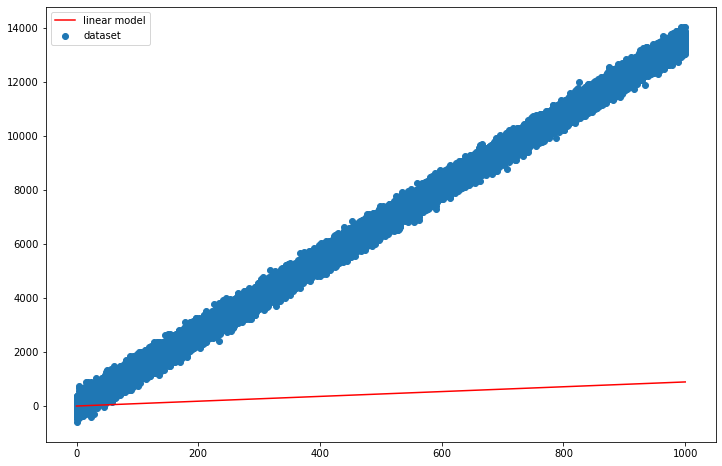

tensor(5943454.5000, grad_fn=<MeanBackward0>)


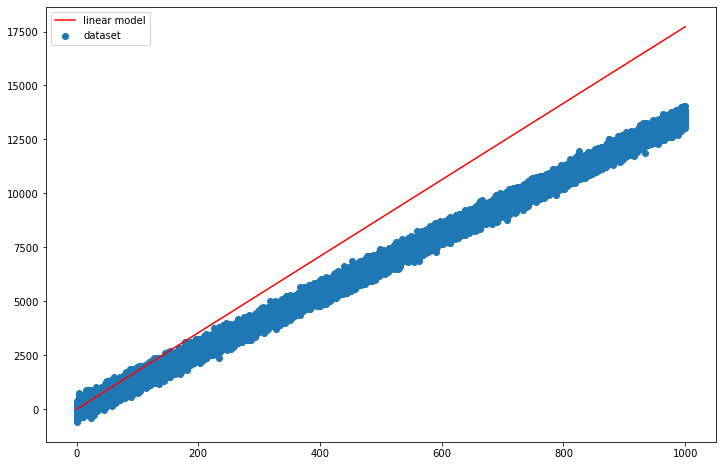

tensor(695777.6250, grad_fn=<MeanBackward0>)


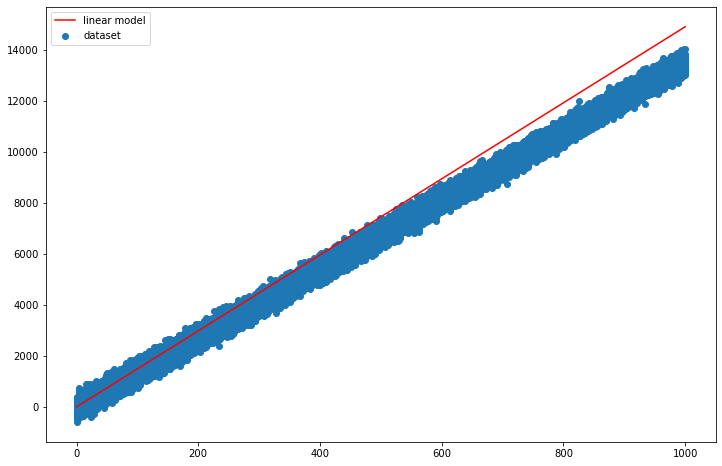

tensor(112725.7578, grad_fn=<MeanBackward0>)


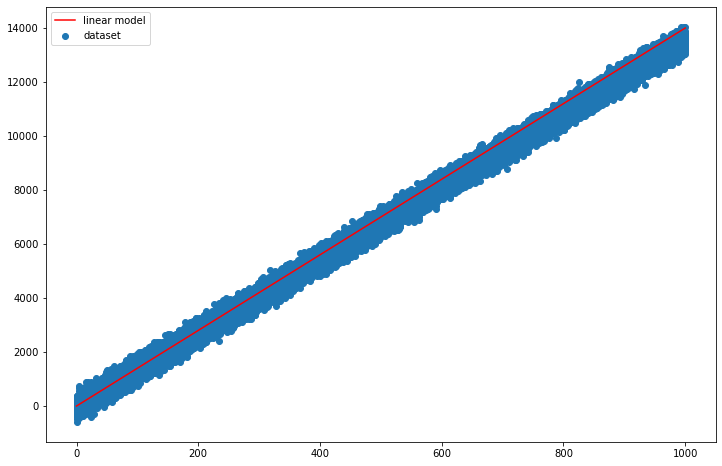

tensor(47944.7383, grad_fn=<MeanBackward0>)


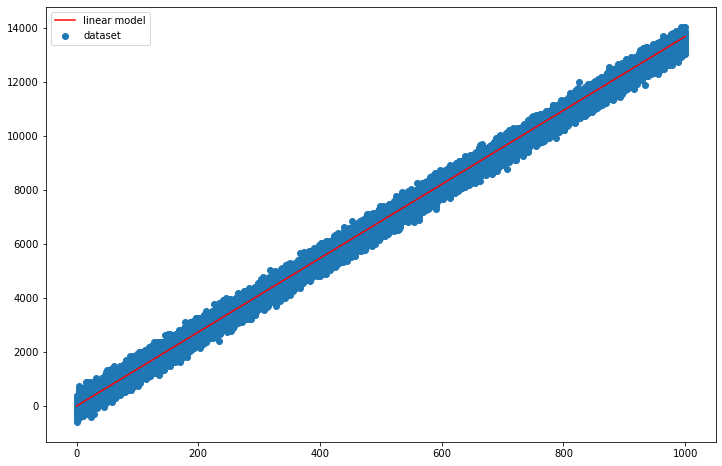

tensor(40747.2148, grad_fn=<MeanBackward0>)


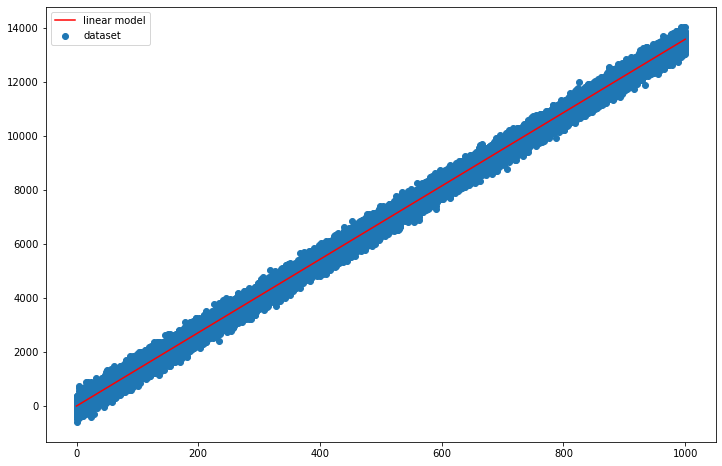

tensor(39947.5312, grad_fn=<MeanBackward0>)


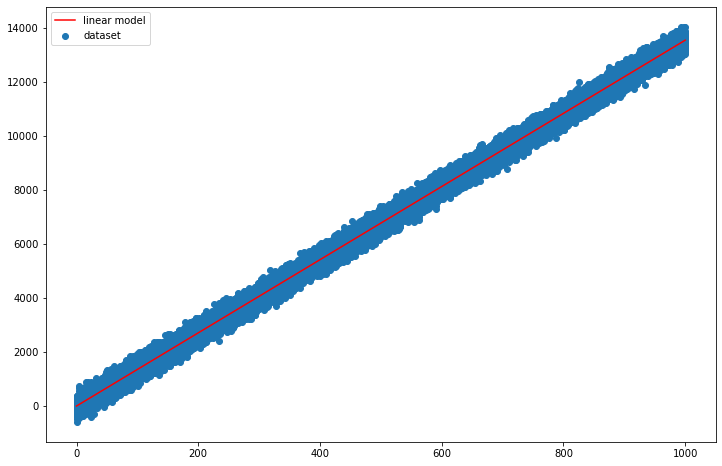

tensor(39858.6836, grad_fn=<MeanBackward0>)


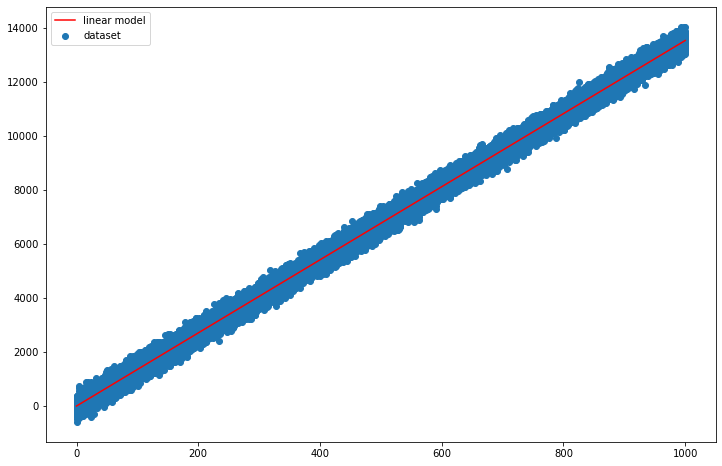

tensor(39848.8125, grad_fn=<MeanBackward0>)


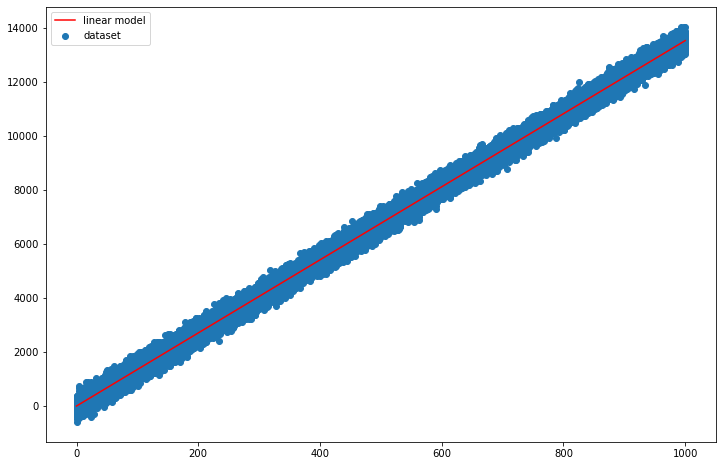

tensor(39847.7188, grad_fn=<MeanBackward0>)


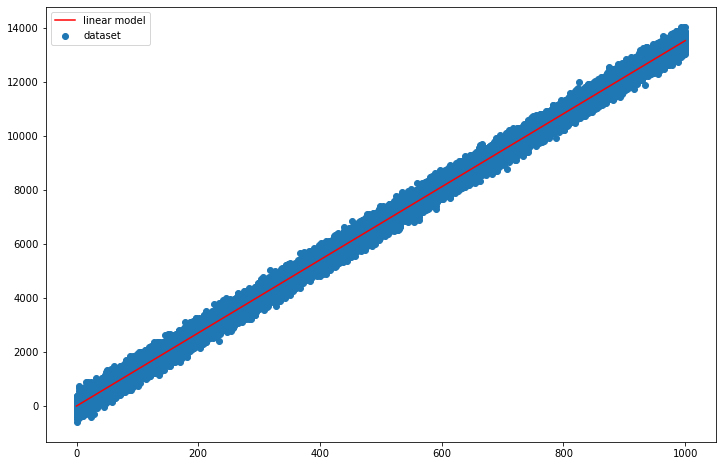

tensor(39847.5938, grad_fn=<MeanBackward0>)


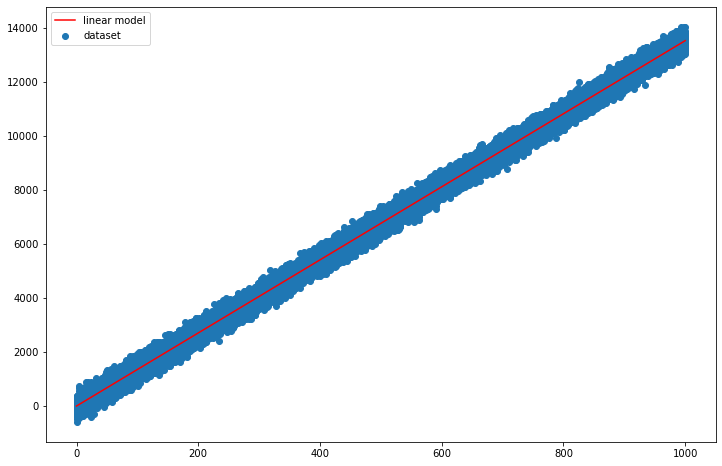

tensor(39847.5820, grad_fn=<MeanBackward0>)


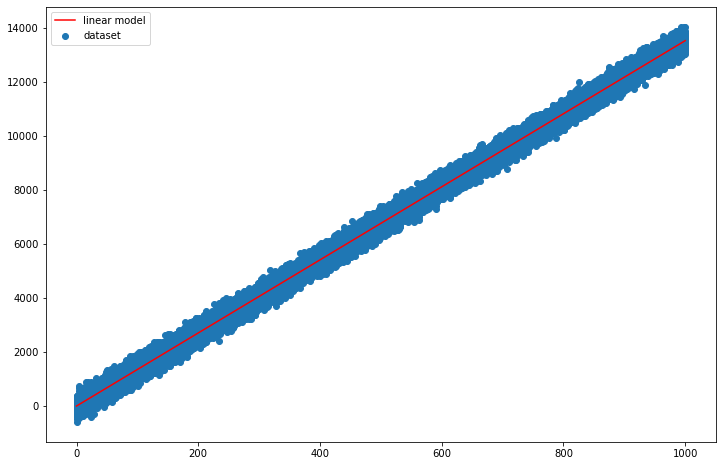

tensor(39847.5781, grad_fn=<MeanBackward0>)


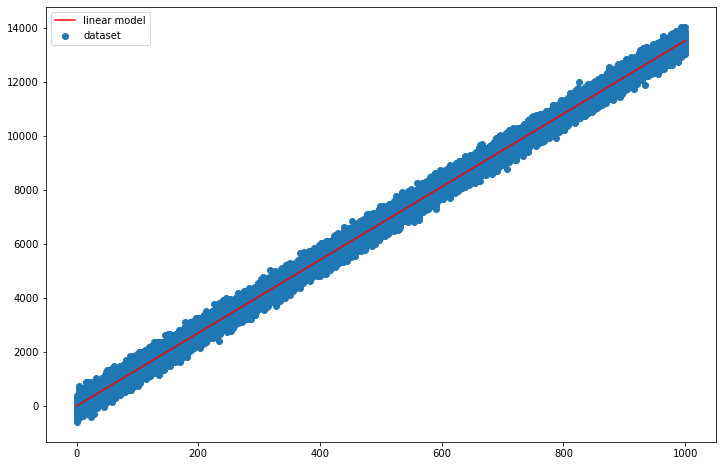

tensor(39847.5781, grad_fn=<MeanBackward0>)


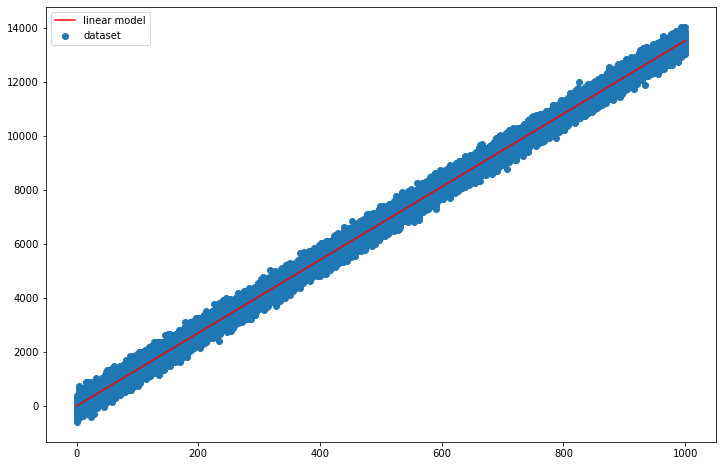

tensor(39847.5781, grad_fn=<MeanBackward0>)


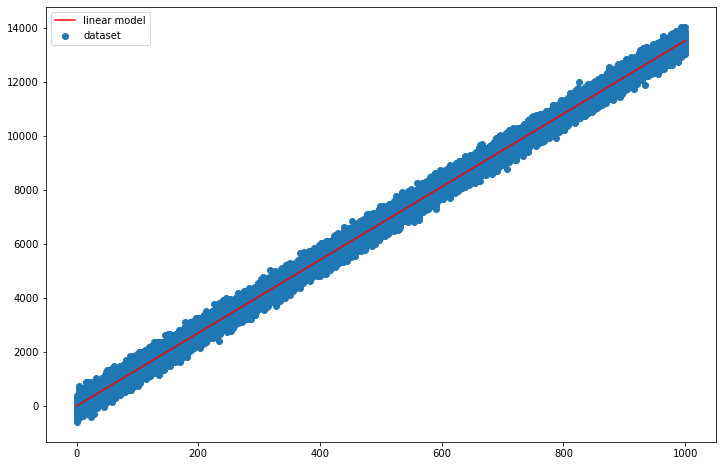

tensor(39847.5781, grad_fn=<MeanBackward0>)


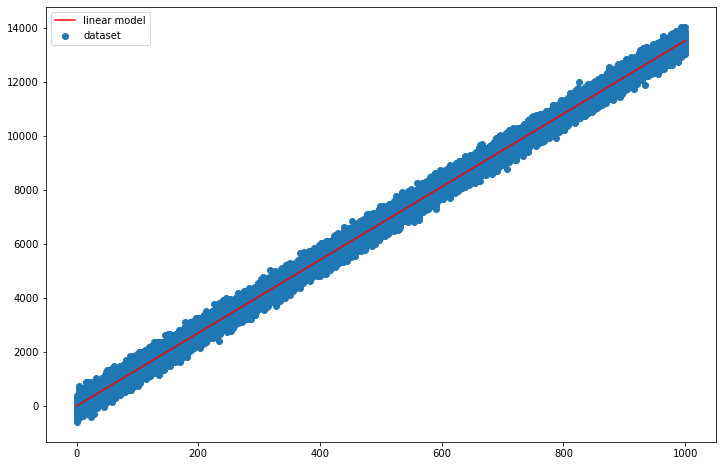

tensor(39847.5781, grad_fn=<MeanBackward0>)


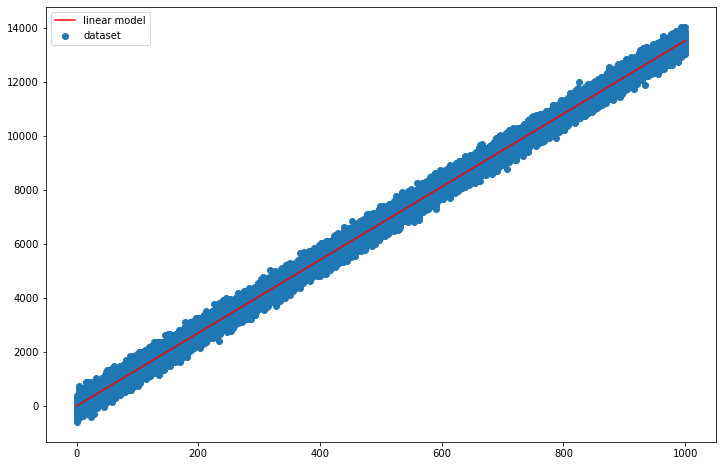

tensor(39847.5781, grad_fn=<MeanBackward0>)


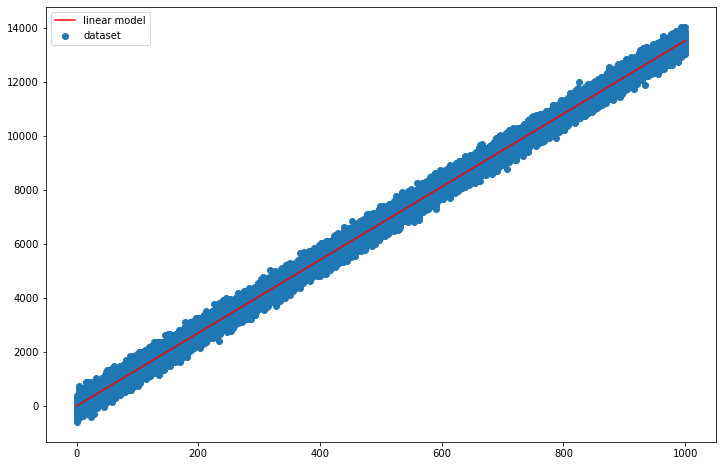

tensor(39847.5781, grad_fn=<MeanBackward0>)


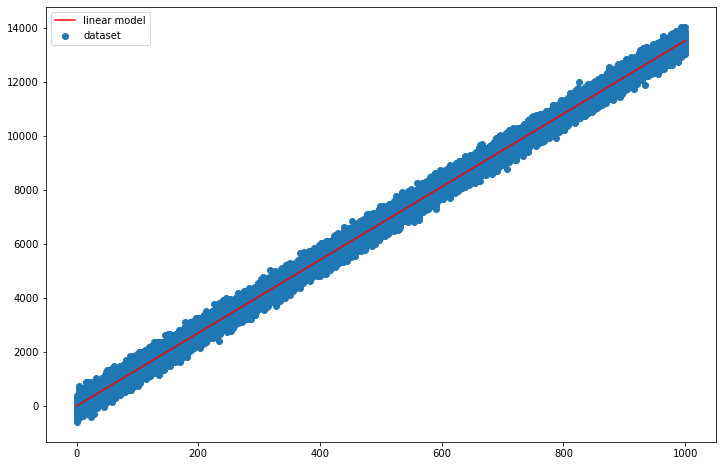

tensor(39847.5781, grad_fn=<MeanBackward0>)


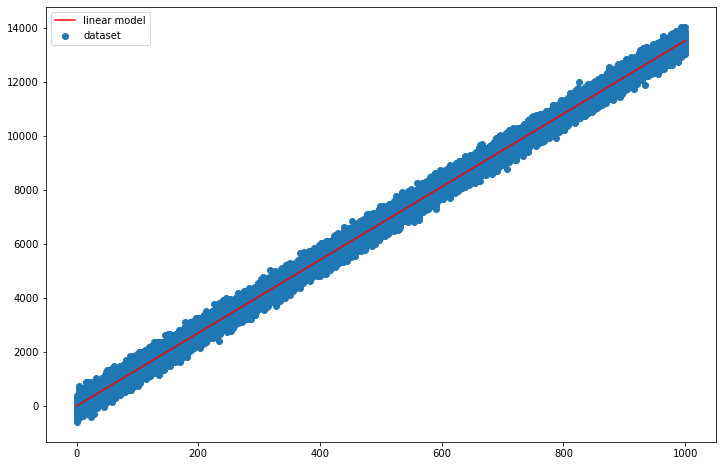

tensor(39847.5781, grad_fn=<MeanBackward0>)


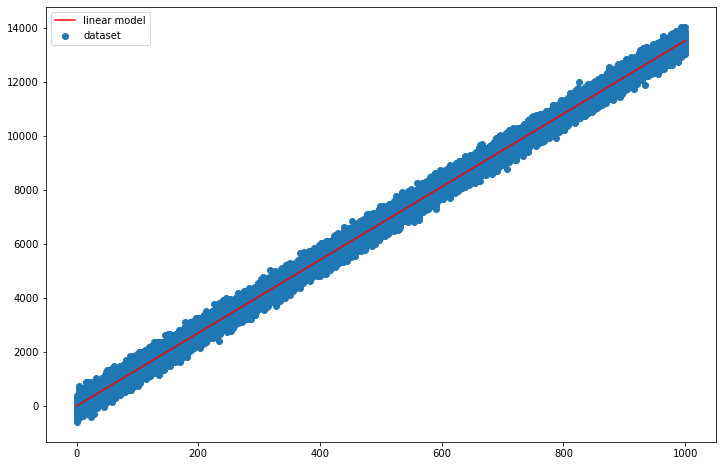

tensor(39847.5781, grad_fn=<MeanBackward0>)


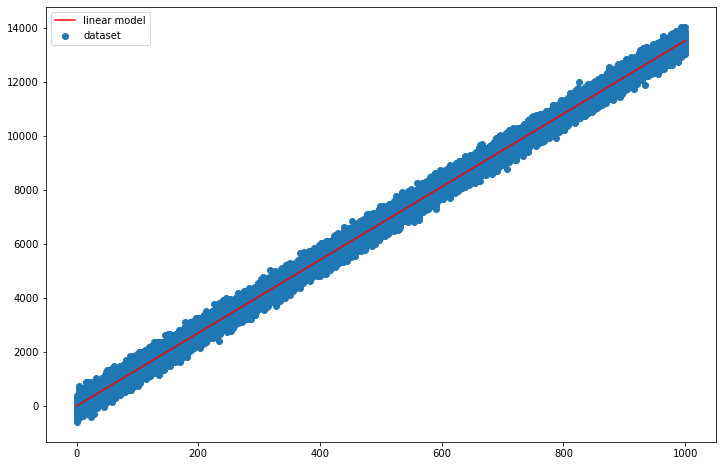

tensor(39847.5781, grad_fn=<MeanBackward0>)


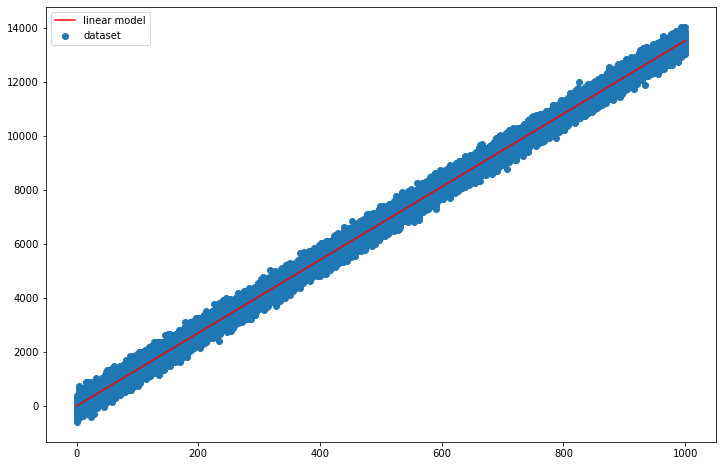

tensor(39847.5781, grad_fn=<MeanBackward0>)


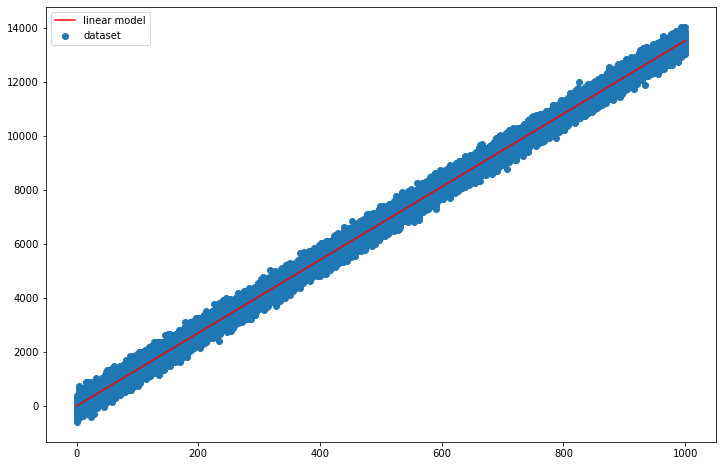

tensor(39847.5781, grad_fn=<MeanBackward0>)


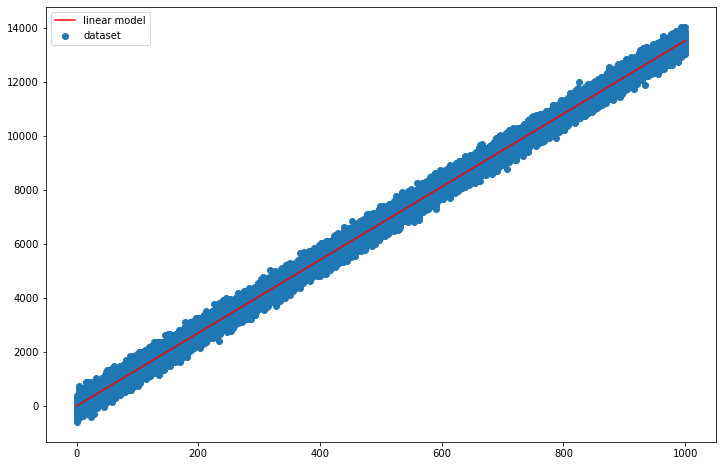

tensor(39847.5781, grad_fn=<MeanBackward0>)


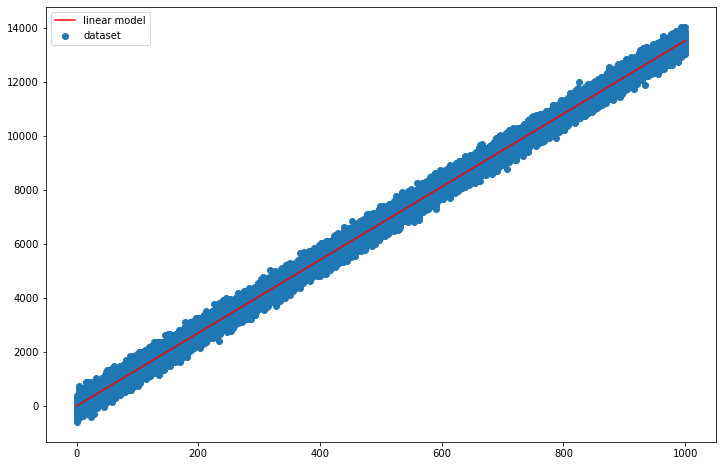

tensor(39847.5781, grad_fn=<MeanBackward0>)


KeyboardInterrupt: 

In [20]:
for i in range(100):
    y_linmod = model1(x_samples)
    errore = torch.mean(torch.pow(y_samples-y_linmod, 2))
    errore.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(errore)
    ax = plt.figure(figsize = (12,8))
    plt.scatter(x_samples.numpy(),y_samples.numpy(), label="dataset")
    plt.plot(x_samples.numpy(),y_linmod.detach().numpy(),'r', label="linear model")
    plt.legend()
    plt.show()
    

Come si vede dai grafici sopra la convergenza è velocissima, già alla seconda iterazione la linea rossa si attesta sulla nuvola blu.<br>
Un altro paio di iterazioni e il fitting è ottimale.

I parametri ottimizzati sono:

In [21]:
list(model1.parameters())

[Parameter containing:
 tensor([[13.5154]], requires_grad=True),
 Parameter containing:
 tensor([0.8408], requires_grad=True)]

Come si vede il model.weight è molto vicino al valore di $m = 13.5$ che avevamo usato per generare il dataset.<br>
Il valore di q invece si discosta abbastanza, 12 contro -0.2154<br>
Qualche <strong>ipotesi</strong> sul perché di questa discrepanza?

## Neural Net

In [99]:
class MyNetworkClass(nn.Module):
    
    def __init__ (self, depth_layers, dim_hidden_layer, learning_rate):
        
        super(MyNetworkClass, self).__init__()
        
        self.par = (depth_layers, dim_hidden_layer, learning_rate)
        
        if depth_layers==1:
            dim_hidden_layer = 1 #corregge dim_hidden_layer
        
        self.model = nn.Sequential( #layers di ingresso
            nn.Linear(in_features=1, out_features=dim_hidden_layer, bias=True), 
            nn.ReLU(),    
        )

        
        if depth_layers > 2: #layers intermedi
            for i in range(depth_layers-1):
                self.model.add_module('lin_lay_'+str(i),nn.Linear(dim_hidden_layer,dim_hidden_layer))
                self.model.add_module('rel_lay_'+str(i),nn.ReLU())
        
        if depth_layers > 1: #layers di uscita
            self.model.add_module('lin_lay_'+str(depth_layers),nn.Linear(dim_hidden_layer,1))
            self.model.add_module('rel_lay_'+str(depth_layers),nn.ReLU())
        
        self.loss_fn = nn.MSELoss(reduction='mean')
        
        self.opt = torch.optim.SGD(self.model.parameters(), lr=learning_rate)
    
    def forward(self,x):
        
        y_pred = self.model(x)
        return y_pred
    
    def fit(self, x, y, reset=True):
        
        
        y_pred = self.model(x)
        
        
        loss = self.loss_fn(y_pred, y)
        
        self.opt.zero_grad()         #azzera i gradienti
        loss.backward()              #calcola i gradienti
        
        self.opt.step()              #aggiorna i parametri
        
        
        #calculate error
        #backprop
        
        print(loss.data)
        return(loss.data)
    
    def data_batch(self, x, y, batch_size):
        
        train = torch.utils.data.TensorDataset(x, y)
        train_loader = torch.utils.data.DataLoader(
            train, batch_size=self.batch_size, shuffle=self.shuffle
        )
        return train_loader
    
    def epoch_fit(self, batch_size, x, y, reset=True):
        
        self.batch_size = batch_size
        self.shuffle = True
        
#         if reset:
#             for layer in self.model.children():
#                 if hasattr(layer, 'reset_parameters'):
#                     layer.reset_parameters()
        
        train_loader = self.data_batch(x, y, batch_size)
               
        for i in range(len(train_loader)):
            xbatch,ybatch = next(iter(train_loader))
            y_pred = self.model(xbatch)
            loss = self.loss_fn(y_pred, ybatch)
            loss.backward()              #calcola i gradienti

            self.opt.step()              #aggiorna i parametri
            self.opt.zero_grad()         #azzera i gradienti
        
        #calculate error
        #backprop
        
        print(loss.data)
        return(loss.data)
    


In [137]:
mynn = MyNetworkClass(depth_layers=2, dim_hidden_layer=12, learning_rate=1e-5)

In [138]:
y_nn_pred = mynn.forward(x_samples)
y_nn_pred

tensor([[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        ...,
        [17.6329],
        [17.6333],
        [17.6336]], grad_fn=<ReluBackward0>)

In [139]:
y_nn_pred = mynn.forward(x_samples)

mynn.loss_fn(y_nn_pred, y_samples).data.numpy()

array(60781976., dtype=float32)

In [140]:
print(mynn)

MyNetworkClass(
  (model): Sequential(
    (0): Linear(in_features=1, out_features=12, bias=True)
    (1): ReLU()
    (lin_lay_2): Linear(in_features=12, out_features=1, bias=True)
    (rel_lay_2): ReLU()
  )
  (loss_fn): MSELoss()
)


In [141]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

num_par = count_parameters(mynn)
num_par

37

In [142]:
step = 10

batch_size = 50001

y_nn_pred = mynn.forward(x_samples)
err_in = mynn.loss_fn(y_nn_pred, y_samples).data.numpy()

for i in range(step):
    mynn.epoch_fit(batch_size,x_samples, y_samples, reset=False)

y_nn_pred = mynn.forward(x_samples)
err_fin = mynn.loss_fn(y_nn_pred, y_samples).data.numpy()

tensor(60781976.)
tensor(4.9917e+11)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940272.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)


In [143]:
y_nn_pred = mynn.forward(x_samples)
y_nn_pred

tensor([[13.2677],
        [ 0.6132],
        [ 0.0000],
        ...,
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]], grad_fn=<ReluBackward0>)

In [28]:
results = pd.DataFrame(columns=('depth','dim','lr','num_par','batch','step','err_in','err_fin'))
results

,depth,dim,lr,num_par,batch,step,err_in,err_fin


In [29]:
def enter_data(idx):
    results.loc[idx,results.columns[0:3]] = mynn.par
    results.loc[idx,results.columns[3]] = num_par
    results.loc[idx,results.columns[4]] = batch_size
    results.loc[idx,results.columns[5]] = step
    results.loc[idx,results.columns[6]] = err_in
    results.loc[idx,results.columns[7]] = err_fin    

if np.isnan(results.index.max()):
    enter_data(0)
else:
    ultimo_idx = results.index[-1]+1
    enter_data(ultimo_idx)

results

,depth,dim,lr,num_par,batch,step,err_in,err_fin
0,2,24,100,73,50001,10,60678804.0,60940268.0


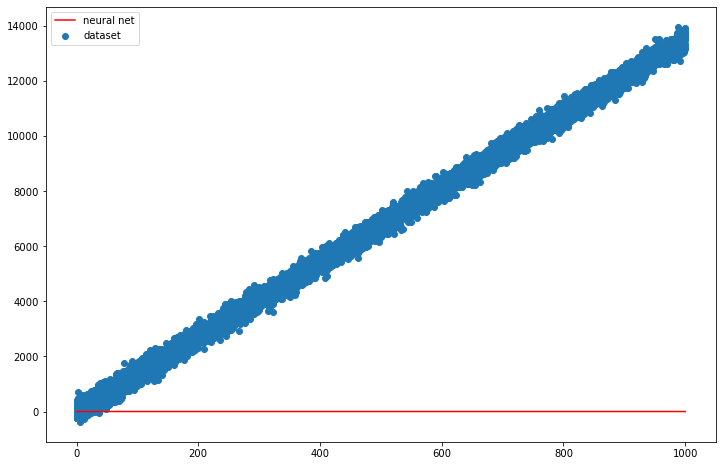

In [86]:
ax = plt.figure(figsize = (12,8))
plt.scatter(x_samples.numpy(),y_samples.numpy(), label="dataset")
plt.plot(x_samples.numpy(),y_nn_pred.detach().numpy(),'r', label="neural net")
plt.legend()
plt.show()

In [ ]:
for par in mynn.parameters():
    print(par)

In [99]:
np.var(y_samples.numpy())

15202982.0

In [43]:
train = torch.utils.data.TensorDataset(x_samples, y_samples)

train_loader = torch.utils.data.DataLoader(
    train, batch_size=10, shuffle=True
)

In [32]:
for batch_ndx, sample in enumerate(train_loader):
    print(batch_ndx, len(sample), sample[0].shape)

0 2 torch.Size([10, 1])
1 2 torch.Size([10, 1])
2 2 torch.Size([10, 1])
3 2 torch.Size([10, 1])
4 2 torch.Size([10, 1])
5 2 torch.Size([10, 1])
6 2 torch.Size([10, 1])
7 2 torch.Size([10, 1])
8 2 torch.Size([10, 1])
9 2 torch.Size([10, 1])
10 2 torch.Size([10, 1])
11 2 torch.Size([10, 1])
12 2 torch.Size([10, 1])
13 2 torch.Size([10, 1])
14 2 torch.Size([10, 1])
15 2 torch.Size([10, 1])
16 2 torch.Size([10, 1])
17 2 torch.Size([10, 1])
18 2 torch.Size([10, 1])
19 2 torch.Size([10, 1])
20 2 torch.Size([10, 1])
21 2 torch.Size([10, 1])
22 2 torch.Size([10, 1])
23 2 torch.Size([10, 1])
24 2 torch.Size([10, 1])
25 2 torch.Size([10, 1])
26 2 torch.Size([10, 1])
27 2 torch.Size([10, 1])
28 2 torch.Size([10, 1])
29 2 torch.Size([10, 1])
30 2 torch.Size([10, 1])
31 2 torch.Size([10, 1])
32 2 torch.Size([10, 1])
33 2 torch.Size([10, 1])
34 2 torch.Size([10, 1])
35 2 torch.Size([10, 1])
36 2 torch.Size([10, 1])
37 2 torch.Size([10, 1])
38 2 torch.Size([10, 1])
39 2 torch.Size([10, 1])
40 2 torch

In [58]:
x,y = next(iter(train_loader))

In [59]:
x

tensor([[854.8000],
        [734.1000],
        [462.8000],
        [159.9000],
        [164.6000],
        [571.0000],
        [187.5000],
        [ 44.8000],
        [ 86.8000],
        [ 81.8000]])

In [53]:
y

tensor([[ 4862.5171],
        [ 4313.1587],
        [ 4759.4424],
        [12971.6904],
        [ 2568.3359],
        [ 7960.7466],
        [ 9428.4180],
        [12652.5293],
        [ 5844.8071],
        [ 7735.8350]])

In [113]:
step = 1000

y_nn_pred = mynn.forward(x_samples)
err_in = mynn.loss_fn(y_nn_pred, y_samples).data.numpy()

# err_in = float(mynn.fit(x_samples, y_samples).numpy())
for i in range(step):
    mynn.fit(x_samples, y_samples)
# cfloat(mynn.fit(x_samples, y_samples).numpy())

y_nn_pred = mynn.forward(x_samples)
err_fin = mynn.loss_fn(y_nn_pred, y_samples).data.numpy()

tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(60940268.)
tensor(609

In [71]:
def gen_():
    if self.batches_per_epoch is None:
        while True:
            yield from enumerate(train_loader)
            yield None
    else:
        iidx = 0
        it = itertools.chain.from_iterable(iter(lambda:enumerate(train_loader), None))
        while True:
            yield next(it)
            iidx += 1
            if not idx % self.batches_per_epoch:
                yield None

train_batches = gen_()

In [72]:
train_batches

<generator object gen_ at 0x00000172ABE4B0C8>

In [47]:
for name, module in mynn.model.named_children():
    print('resetting ', name)
    module.reset_parameters()

resetting  0
resetting  1


ModuleAttributeError: 'ReLU' object has no attribute 'reset_parameters'

In [54]:
for layer in mynn.model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

In [55]:
for par in mynn.model.parameters():
    print(par)

Parameter containing:
tensor([[ 0.8110],
        [ 0.2126],
        [-0.6049],
        [-0.6073],
        [ 0.7107],
        [ 0.4035],
        [ 0.4321],
        [ 0.0141],
        [-0.1491],
        [-0.4491],
        [ 0.7761],
        [-0.6400],
        [ 0.9083],
        [-0.1308],
        [ 0.6932],
        [ 0.8417],
        [ 0.4376],
        [-0.8834],
        [-0.7028],
        [-0.2333],
        [ 0.0516],
        [ 0.9077],
        [ 0.9916],
        [-0.1927]], requires_grad=True)
Parameter containing:
tensor([ 0.2409, -0.2601, -0.4576,  0.4104, -0.9854, -0.0663, -0.9635, -0.5082,
        -0.1856,  0.1184, -0.5451,  0.7913, -0.0869, -0.6195,  0.4428,  0.0198,
        -0.6062,  0.6417,  0.7318,  0.4802, -0.0234,  0.3210,  0.8172,  0.8949],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0201,  0.1867,  0.1504,  0.1123,  0.1354, -0.1968, -0.1463, -0.1697,
          0.2015, -0.0586,  0.1610, -0.1825,  0.1955, -0.1721,  0.0595, -0.0436,
          0.1168,  0.0548, 

### Modello di regressione lineare multidimensionale

Facciamo un esempio con più variabili di ingresso. 4 ingressi per essere precisi.
Questi sono gli step:
- genero un dataset
- creo il modello di regressione lineare
- definisco una funzione errore e un ottimizzatore
- faccio il training del modello

#### Genero un dataset

Creo un dataset di 1000 punti $(x_1,x_2,x_3,x_4,y)$. <br>
Per i dati di ingresso uso la funzione torch.linspace. <br>
I dati di uscita sono una combinazione lineare degli ingressi, i coefficienti $m_i$ sono stati scelti in modo che ogni ingresso contribuisca sull'uscita.   

In [26]:
#x1 = torch.linspace(0,100,100).view(-1,1)
#x2 = torch.linspace(-1,1,100).view(-1,1)
#x3 = torch.linspace(-10,0,100).view(-1,1)
#x4 = torch.linspace(75,150,100).view(-1,1)
x1 = np.linspace(0,100,50)
x2 = np.linspace(-1,1,50)
x3 = np.linspace(-10,0,50)
x4 = np.linspace(75,150,50)

m1, m2, m3, m4 = 0.5, 25, 50, -0.66 #coeff angolare per ogni direzione
M = torch.tensor([m1,m2,m3,m4]).view([-1,1]) #combino i coeff angolari in un vettore colonna

# X = torch.from_numpy(x_comb).type(torch.float) # setto float altrimenti si setta automaticamente double e da errore


# y_samples = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 
# y_samples = torch.from_numpy(y_samples).type(torch.float)

Genero uno spazio a 4 dimensioni, usando le coordinate x1,x2,x3,x4:

In [27]:
x_comb = np.array([[x1[i],x2[j],x3[l],x4[m]] 
      for i in range(x1.shape[0]) 
      for j in range(x2.shape[0]) 
      for l in range(x3.shape[0]) 
      for m in range(x4.shape[0])])

x_comb.shape

(6250000, 4)

In [28]:
x_comb

array([[  0.        ,  -1.        , -10.        ,  75.        ],
       [  0.        ,  -1.        , -10.        ,  76.53061224],
       [  0.        ,  -1.        , -10.        ,  78.06122449],
       ...,
       [100.        ,   1.        ,   0.        , 146.93877551],
       [100.        ,   1.        ,   0.        , 148.46938776],
       [100.        ,   1.        ,   0.        , 150.        ]])

Converto x_comb in un tensore e setto il tipo su flot(=float32), poichè il tipo double(=float64) genera un errore: 

In [29]:
X = torch.from_numpy(x_comb).type(torch.float)

Calcolo l'uscita del modello lineare:

In [30]:
y_samples = torch.mm(X,M)
y_samples.shape

torch.Size([6250000, 1])

Così ho completato la geneerazione del set di dati (x_samples, y_samples)

#### Creazione modello Lineare

Definiamo il modello:

In [31]:
model2 = torch.nn.Linear(4,1)

Questi sono i parametri, inizializzati in maniera random:

In [32]:
model2.weight, model2.bias

(Parameter containing:
 tensor([[-0.4316, -0.4871, -0.4270, -0.2966]], requires_grad=True),
 Parameter containing:
 tensor([0.4618], requires_grad=True))

I dati di input li abbiamo definiti in precedenza, verifichiamo il tipo del tensore X: 

In [35]:
X.type()

'torch.FloatTensor'

Calcolo l'uscita del modello lineare, e verifico che lo shape dell'uscita si giusta.<br>
1000 punti di ingresso, ne generano altrettanti in uscita, pertanto è corretto.

In [36]:
y_linmod = model2(X)
y_linmod.shape

torch.Size([6250000, 1])

L'errore quadratico medio è:

In [37]:
errore = torch.mean(torch.pow(y_samples-y_linmod,2))
errore

tensor(84055.8906, grad_fn=<MeanBackward1>)

Plottiamo le uscite generate e confrontiamole con quelle del dataset.<br>
Sull'asse x metto l'ordinale del punto.

In [38]:
asse_x = np.linspace(0, X.shape[0]-1, num=X.shape[0])

In [39]:
def downsample_4_plot(asse_x, downsample_factor):
    asse_x_dwnsmpl = asse_x[0:-1:downsample_factor]
    return asse_x_dwnsmpl

In [40]:
downsample_factor = 25000
asse_x_dwnsmpl = downsample_4_plot(asse_x,downsample_factor)
y_samples_dwnsmpl = downsample_4_plot(y_samples, downsample_factor)
y_linmod_dwnsmpl = downsample_4_plot(y_linmod, downsample_factor)
asse_x_dwnsmpl.shape

(250,)

In [41]:
y_linmod_dwnsmpl = downsample_4_plot(y_linmod, downsample_factor)
y_linmod_dwnsmpl.shape

torch.Size([250, 1])

In [42]:
asse_x.shape, X.shape, y_samples.shape, y_linmod.shape

((6250000,),
 torch.Size([6250000, 4]),
 torch.Size([6250000, 1]),
 torch.Size([6250000, 1]))

In [43]:
asse_x[0:-1:downsample_factor].shape

(250,)

In [44]:
downsample_factor

25000

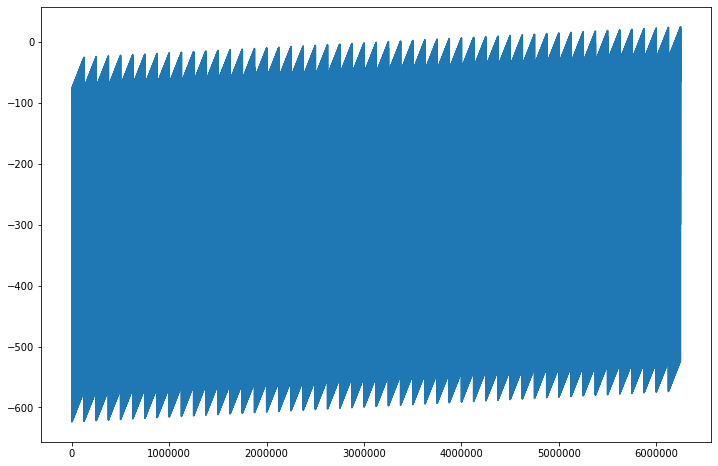

In [45]:
ax = plt.figure(figsize = (12,8))
plt.plot(asse_x,y_samples.detach().numpy())
plt.show()

In [46]:
y_samples.numpy()[0:200000:downsample_factor]

array([[-574.5    ],
       [-564.2959 ],
       [-554.09186],
       [-543.88776],
       [-533.6837 ],
       [-573.4796 ],
       [-563.2755 ],
       [-553.0715 ]], dtype=float32)

In [47]:
y_linmod.detach().numpy()[0:-1:downsample_factor].shape

(250, 1)

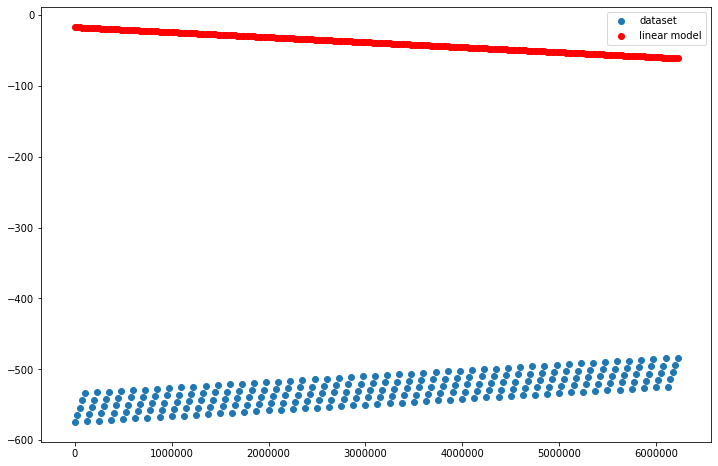

In [48]:
ax = plt.figure(figsize = (12,8))
plt.scatter(asse_x[0:-1:downsample_factor],y_samples.numpy()[0:-1:downsample_factor], label="dataset")
plt.scatter(asse_x[0:-1:downsample_factor],y_linmod.detach().numpy()[0:-1:downsample_factor],c='r', label="linear model")
plt.legend()
plt.show()

Definiamo il SGD come ottimizzatore, indichiamo che i parametri di ottimizzazione sono quelli di model2, e gli diamo un passo di apprendimento abbastanza piccolo da essere sicuri che converga, ma senza essere troppo lenti, dopo qualche iterazione sono arrivato a 5e-5:

In [49]:
model2 = torch.nn.Linear(4,1) #ridefinisco il modello per azzerare i calcoli precedenti
optimizer = torch.optim.SGD(model2.parameters(), 5e-5)

Adesso sono pronto ad eseguire il training del modello.<br>
I passi sono i soliti:<br>
-calcolo dell'uscita<br>
-calcolo dell'errore<br>
-calcolo del gradiente (errore.backward)<br>
-aggionamento dei parametri (optimizer.step)<br>
-reset del gradiente (optimizer.zero_grad)

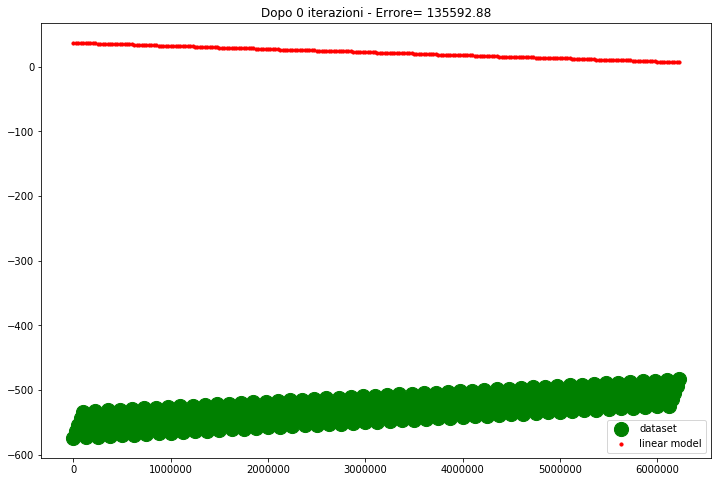

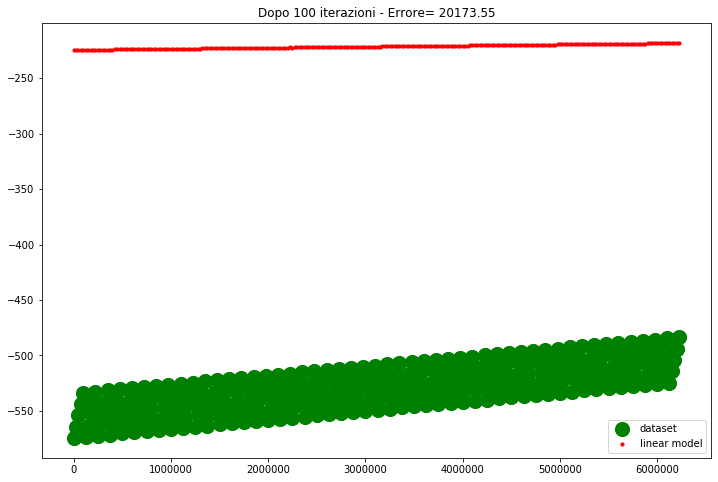

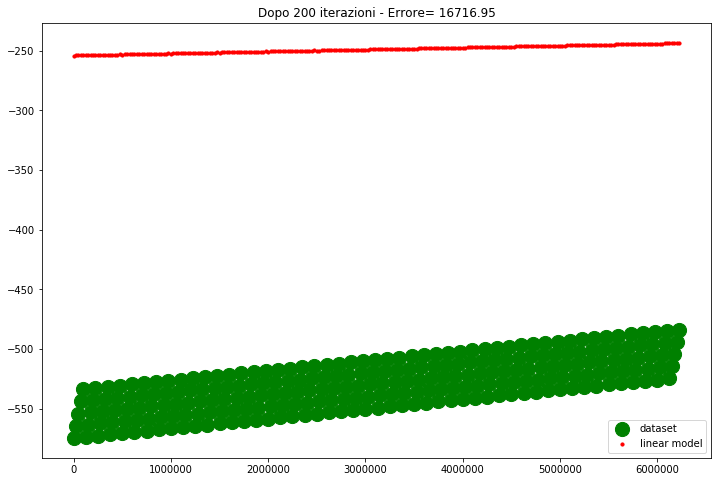

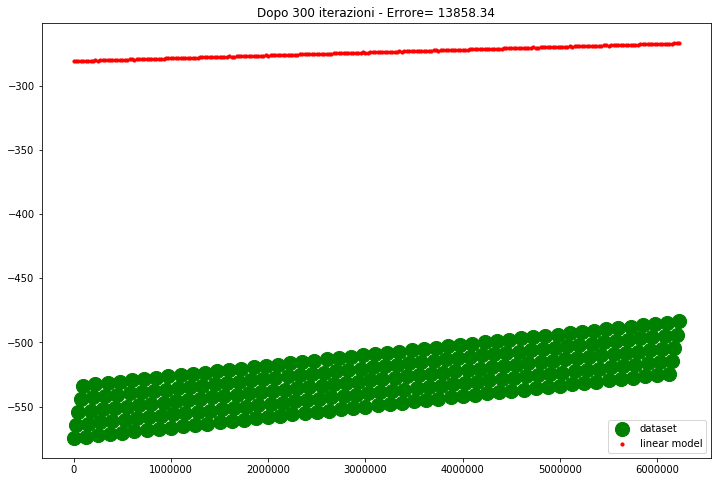

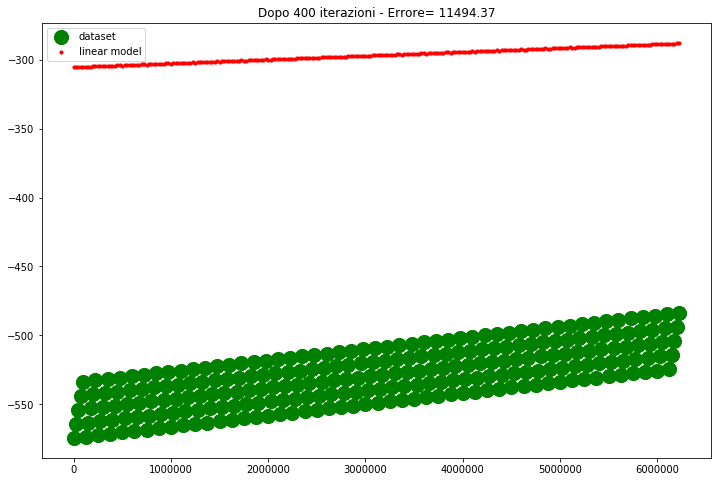

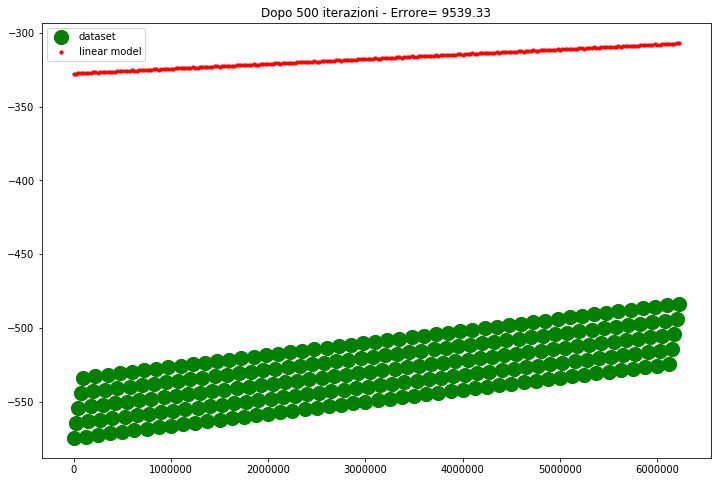

In [50]:
for itr in range(501):
    y_linmod = model2(X)   #calcolo l'uscita con il modello corrente
    errore = torch.mean(torch.pow(y_samples-y_linmod,2)) #calcolo l'errore tra l'uscita desiderata e l'uscita corrente
    errore.backward()      #applico la funzione backward, le derivate parziali dell'errore vengono calcolate rispetto alle variabili per cui è definito required_grad=True
    optimizer.step()       #aggiornamento dei parametri da ottimizzare usando le derivate calcolate nel passo precedente
    optimizer.zero_grad()  #azzero i gradienti
    if ((itr==0) or (itr==100) or (itr==200) or (itr==300) or (itr==400) or (itr==500)) : #genera il grafico agli step fissati 
        ax = plt.figure(figsize = (12,8))
        plt.scatter(downsample_4_plot(asse_x,downsample_factor),
                    downsample_4_plot(y_samples, downsample_factor).numpy(),
                    label="dataset", c='g', s=200)
        plt.scatter(downsample_4_plot(asse_x,downsample_factor),
                    downsample_4_plot(y_linmod, downsample_factor).detach().numpy().reshape(1,-1),
                    c='r', label="linear model",s=10)
        plt.legend()
        plt.title('Dopo %d iterazioni - Errore= %1.2f' %(itr,errore))
        plt.show()

Come si vede dopo 500 iterazioni l'errore è abbastanza alto e la convergenza abbastanza lenta.<br>

Se provo ad alzare il learning rate, l'errore inizia a divergere, per cui non è una strada praticabile.<br>
La domanda che mi pongo è: come mai con un learning rate così basso (5e-5) la convergenza è così critica che basta alzare il learning rate di poco (per esempio 1e-4) perché la convergenga sia compromessa.<br>
La risposta che riesco a darmi è che gli ordini di grandezza delle variabili d'ingresso sono diversi, per cui lo spostamento del punto (dipendente dal learning rate e dal gradiente) deve essere compatibile con tutte le variabili, pertanto deve essere piccolo.<br>
Vediamo se riesco a velocizzare la convergenza <strong>normalizzando</strong> le variabili $x_1, x_2, x_3, x_4$.

Normalizziamo le coordinate.

In [51]:
X.shape

torch.Size([6250000, 4])

In [52]:
m[0]

TypeError: 'float' object is not subscriptable

In [ ]:
m = X.min(dim=0)               #valore minimo per ogni colonna di X
M = X.max(dim=0)               #valore massimo per ogni colonna
u = (M[0]+m[0])/2              #valor medio per ogni colonna
d = (M[0]-m[0]).view([1,-1])   #intervallo min-max, per ogni colonna

m = X.min(dim=0)                     #valore minimo per ogni colonna di X
M = X.max(dim=0)                     #valore massimo per ogni colonna
u = (M.values+m.values)/2            #valor medio per ogni colonna
d = (M.values-m.values).view([1,-1]) #intervallo min-max, per ogni colonna

Ad ogni coordinata sottraggo il suo valor medio e divido per l'intervallo di variazione:

\begin{equation*}
\hat{x_i} =  \frac {x_i - u}{d} \hspace{1cm} \forall i=1,2,3,4
\end{equation*}

Il nuovo set di coordinate è $\hat{x_1},\hat{x_2},\hat{x_3},\hat{x_4}$.<br>
Per fare questo calcolo uso <strong>torch.mul</strong> che realizza una moltiplicazione elemento-per-elemento tra i due operatori. Es.:

\begin{equation}
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
a_{31} & a_{32}
\end{bmatrix}
\begin{bmatrix}
b_1 \\
b_2
\end{bmatrix}
=
\begin{bmatrix}
a_{11}*b_1 & a_{12}*b_2 \\
a_{21}*b_1 & a_{22}*b_2 \\
a_{31}*b_1 & a_{32}*b_2
\end{bmatrix}
\end{equation}

In [ ]:
X_norm = torch.mul((X-u),1/d)

Azzero il modello e ridefinisco l'ottimizzatore con un learning rate di 0.1

In [ ]:
model2 = torch.nn.Linear(4,1) #ridefinisco il modello per azzerare i calcoli precedenti
optimizer = torch.optim.SGD(model2.parameters(), 0.1)

Copio il codice di prima per fare il training del modello, cambio solo l'ingresso, stavolta userò X_norm invece di X.

In [ ]:
for itr in range(501):
    y_linmod = model2(X_norm)   #calcolo l'uscita con il modello corrente
    errore = torch.mean(torch.pow(y_samples-y_linmod,2)) #calcolo l'errore tra l'uscita desiderata e l'uscita corrente
    errore.backward()      #applico la funzione backward, le derivate parziali dell'errore vengono calcolate rispetto alle variabili per cui è definito required_grad=True
    optimizer.step()       #aggiornamento dei parametri da ottimizzare usando le derivate calcolate nel passo precedente
    optimizer.zero_grad()  #azzero i gradienti
    if ((itr==0) or (itr==100) or (itr==200) or (itr==300) or (itr==400) or (itr==500)) : #genera il grafico agli step fissati 
        ax = plt.figure(figsize = (12,8))
        plt.scatter(downsample_4_plot(asse_x,downsample_factor),
                    downsample_4_plot(y_samples, downsample_factor).numpy(),
                    label="dataset", c='g', s=200)
        plt.scatter(downsample_4_plot(asse_x,downsample_factor),
                    downsample_4_plot(y_linmod, downsample_factor).detach().numpy().reshape(1,-1),
                    c='r', label="linear model",s=10)
        plt.legend()
        plt.title('Dopo %d iterazioni - Errore= %1.2f' %(itr,errore))
        plt.show()

Sull'asse y abbiamo i valori di uscita, sull'asse x abbiamo l'ordinale del punto (e non la variabile di ingresso, poichè era impossibile riprodurre i 4 ingressi su grafico).<br>
Per come sono fatti i dati, 4 assi ridotti ad un ordinale, sembra che ci siano 5 linee diverse in realta è un artefatto, dovuto al fatto he mi sto ostinando a rappresentare una cosa che non dovrei.<br>
I valori desiderati li ho rappresentati con un marker molto spesso in modo che la posizione relativa tra le due curve sia ben visibile specialmente nel caso in cui sono vicine o sovrapposte.<br>
Come si vede alla 300esima iterazione i due modelli lineare iniziano a sovrapporsi. Alla 500esima iterazione sono praticamente sovrapposti e l'errore è nullo (o molto basso).

Il training ci ha consegnato questi valori dei parametri ottimizzati:

In [ ]:
model2.weight, model2.bias

I coefficienti angolari così ottenuti devono essere denormalizzati per tornare allo spazio $\mathbb{R}^4$ originale.<br>
Per farlo divido ciascuna coordinata per il delta $d$ che avevo calcolato qualche step sopra.

Anche in questo caso faccio una moltiplicazione elemento-per-elemento con <strong>torch.mul</strong>

In [ ]:
torch.mul(model2.weight,1/d)

Facciamo un confronto con i valori usati per generare il dataset:<br>
m1 = 0.5 vs 0.4999<br>
m2 = 25 vs 24.9961<br>
m3 = 50 vs 49.9919<br>
m4 = -0.66 vs -0.6599<br>
Come si vede i valori trovati sono praticamente perfetti

Usando i parametri ottimizzati calcolo l'uscita e l'errore: 

In [ ]:
y_linmod = model2(X_norm)
errore = torch.mean(torch.pow(y_samples-y_linmod,2))
errore

Come atteso l'errore è molto basso.